In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb
from xgboost import plot_importance

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/dataset_2_1/bert_embeddings_2_1.csv")
data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,759,760,761,762,763,764,765,766,767,labels
0,0,0.115522,0.120725,0.116916,0.028908,0.189101,0.138585,-0.069740,0.195568,-0.163388,...,-0.033318,0.111991,-0.008259,0.082657,-0.259868,-0.365855,0.307502,-0.118487,0.196395,defamation
1,1,-0.063305,-0.175854,0.539785,0.058090,0.223428,-0.125844,-0.226975,0.222206,-0.128272,...,0.437689,-0.107548,-0.479456,0.075470,-0.420229,0.009688,0.257897,0.094962,-0.263901,defamation
2,3,0.519776,-0.501478,0.305727,0.015040,0.528733,0.004844,-0.195037,0.621661,-0.250125,...,0.316832,-0.333766,-0.271076,-0.107719,-0.084357,-0.125359,0.202027,0.132137,-0.143496,defamation
3,4,0.314832,-0.107000,0.487415,-0.030075,-0.063889,0.226470,-0.116691,0.358502,-0.084642,...,0.124459,0.075300,0.117993,0.313323,-0.243439,-0.316153,0.457340,0.137131,-0.184802,defamation
4,5,-0.004540,-0.176425,0.351265,0.144485,0.396583,0.181429,0.105931,0.326533,-0.109663,...,0.223254,-0.133996,-0.159739,0.400618,-0.231794,-0.008590,0.246167,0.183157,0.050734,fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,4041,-0.004737,-0.372562,0.313206,-0.020798,0.467158,0.213140,0.009189,0.108353,-0.355224,...,0.219093,-0.214236,-0.600473,0.129861,-0.284562,-0.110610,0.164652,-0.090044,-0.018130,defamation
1616,4042,-0.103641,0.594657,0.332227,-0.007513,0.214091,0.031883,-0.175174,0.130002,-0.123963,...,0.173265,0.092221,-0.088439,0.186820,-0.209777,-0.253530,0.278047,0.151621,-0.162491,fake
1617,4043,0.105243,-0.174593,0.196325,0.068952,0.208112,0.176256,-0.110949,0.294628,-0.366315,...,0.394137,-0.017774,-0.499330,0.038482,-0.356201,-0.058518,0.350813,-0.000070,0.013664,defamation
1618,4045,0.192417,-0.454516,0.184060,-0.002153,0.139672,0.099237,-0.223884,0.360114,-0.212044,...,-0.014932,0.136302,0.089186,0.243119,-0.267395,-0.105049,0.588393,0.379176,-0.108674,fake


In [ ]:
X=data.drop(["labels","Unnamed: 0"], axis=1)
y=data["labels"]

In [ ]:
for i in range(1620):
  if y[i] == 'fake':
    y[i] = int(1)
  else:
    y[i] = int(0)

<ipython-input-6-e3fb3919ab3a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = int(0)
<ipython-input-6-e3fb3919ab3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = int(1)


In [ ]:
y

0       0
1       0
2       0
3       0
4       1
       ..
1615    0
1616    1
1617    0
1618    1
1619    1
Name: labels, Length: 1620, dtype: object

In [ ]:
y = y.astype(str).astype(int)

In [ ]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.33, random_state=42,shuffle = True)

In [ ]:
ttw1a = []
tw1a = []
tth1a = []
th1a = []
ttw1p = []
tw1p = []
tth1p = []
th1p = []
ttw1r = []
tw1r = []
tth1r = []
th1r = []
ttw1f = []
tw1f = []
tth1f = []
th1f = []

Accuracy of SVM:  0.7738317757009345
Precision of SVM:  0.7780805764889938
Recall of SVM:  0.7738317757009345
F1-score of SVM:  0.7742671088290629
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       244
           1       0.82      0.75      0.78       291

    accuracy                           0.77       535
   macro avg       0.77      0.78      0.77       535
weighted avg       0.78      0.77      0.77       535



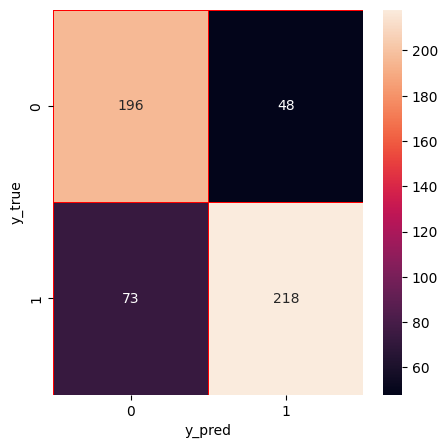

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0)  # You can choose different kernels (e.g., 'linear', 'rbf', 'poly')

# Fit the SVM model to the training data
svm_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_predict = svm_classifier.predict(X_test)

# Calculate accuracy
svm_score = accuracy_score(y_test, y_predict)
print('Accuracy of SVM: ', svm_score)

# Calculate precision, recall, and F1-score
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predict, average='weighted')
print('Precision of SVM: ', precision)
print('Recall of SVM: ', recall)
print('F1-score of SVM: ', fscore)
tw1a.append(svm_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)

# Generate a classification report
print(classification_report(y_test, y_predict))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


Accuracy of SVM:  0.8414746543778802
Precision of SVM:  0.8477666602605778
Recall of SVM:  0.8414746543778802
F1-score of SVM:  0.8401440568229426
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       566
           1       0.89      0.76      0.82       519

    accuracy                           0.84      1085
   macro avg       0.85      0.84      0.84      1085
weighted avg       0.85      0.84      0.84      1085



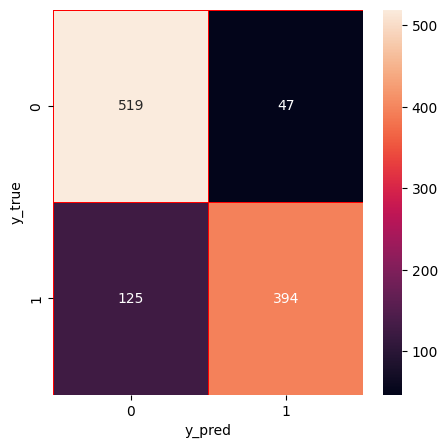

In [ ]:

# Predict the labels for the test data
y_predict = svm_classifier.predict(X_train)

# Calculate accuracy
svm_score = accuracy_score(y_train, y_predict)
print('Accuracy of SVM: ', svm_score)

# Calculate precision, recall, and F1-score
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_predict, average='weighted')
print('Precision of SVM: ', precision)
print('Recall of SVM: ', recall)
print('F1-score of SVM: ', fscore)

ttw1a.append(svm_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)

# Generate a classification report
print(classification_report(y_train, y_predict))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_train, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()




In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define the objective function
def objective(params):
    params = {
        'C': params['C'],
        'kernel': params['kernel'],  # Specify kernel from hyperparameter search space
    }

    clf = SVC(**params)

    # Use cross-validation for better evaluation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy')

    # Calculate the mean accuracy
    score = scores.mean()

    return {'loss': -score, 'status': STATUS_OK}

# Define the hyperparameter search space
space = {
    'C': hp.loguniform('C', -3, 3),  # Search in log scale for C (SVM regularization parameter)
    'kernel': hp.choice('kernel', ['linear', 'poly', 'rbf', 'sigmoid']),
    # You can add more hyperparameters here as needed
}

# Perform hyperparameter tuning
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials)

print("SVM: Hyperopt estimated optimum {}".format(best))


100%|██████████| 20/20 [00:33<00:00,  1.69s/trial, best loss: -0.7741935483870968]
SVM: Hyperopt estimated optimum {'C': 0.7626353670979705, 'kernel': 2}


Accuracy of SVM:  0.7738317757009345
Precision of SVM:  0.7825784988543814
Recall of SVM:  0.7738317757009345
F1-score of SVM:  0.7740783658581584
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       244
           1       0.84      0.73      0.78       291

    accuracy                           0.77       535
   macro avg       0.78      0.78      0.77       535
weighted avg       0.78      0.77      0.77       535



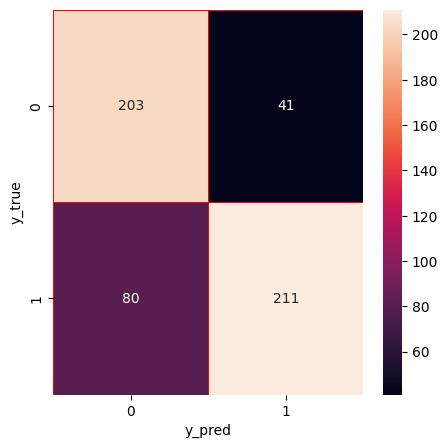

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the SVM classifier
svm_classifier = SVC(kernel='poly', C= 0.36869554839882573)  # You can choose different kernels (e.g., 'linear', 'rbf', 'poly')

# Fit the SVM model to the training data
svm_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_predict = svm_classifier.predict(X_test)

# Calculate accuracy
svm_score = accuracy_score(y_test, y_predict)
print('Accuracy of SVM: ', svm_score)

# Calculate precision, recall, and F1-score
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predict, average='weighted')
print('Precision of SVM: ', precision)
print('Recall of SVM: ', recall)
print('F1-score of SVM: ', fscore)
th1a.append(svm_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)

# Generate a classification report
print(classification_report(y_test, y_predict))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


Accuracy of SVM:  0.823963133640553
Precision of SVM:  0.8347816186417373
Recall of SVM:  0.823963133640553
F1-score of SVM:  0.8216077939837053
              precision    recall  f1-score   support

           0       0.78      0.92      0.85       566
           1       0.89      0.72      0.80       519

    accuracy                           0.82      1085
   macro avg       0.84      0.82      0.82      1085
weighted avg       0.83      0.82      0.82      1085



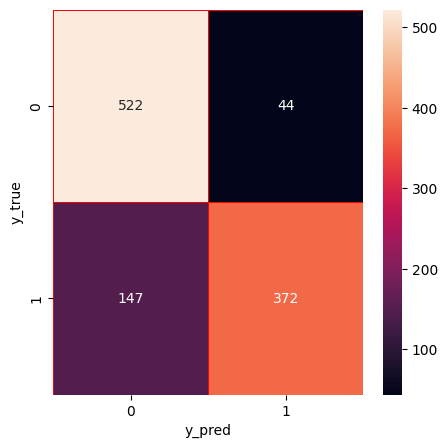

In [ ]:

# Predict the labels for the test data
y_predict = svm_classifier.predict(X_train)

# Calculate accuracy
svm_score = accuracy_score(y_train, y_predict)
print('Accuracy of SVM: ', svm_score)

# Calculate precision, recall, and F1-score
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_predict, average='weighted')
print('Precision of SVM: ', precision)
print('Recall of SVM: ', recall)
print('F1-score of SVM: ', fscore)

tth1a.append(svm_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)

# Generate a classification report
print(classification_report(y_train, y_predict))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_train, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()




Accuracy of XGBoost: 0.7252336448598131
Precision of XGBoost: 0.7263038801826874
Recall of XGBoost: 0.7252336448598131
F1-score of XGBoost: 0.725563618044323
              precision    recall  f1-score   support

           0       0.69      0.72      0.70       244
           1       0.76      0.73      0.74       291

    accuracy                           0.73       535
   macro avg       0.72      0.72      0.72       535
weighted avg       0.73      0.73      0.73       535



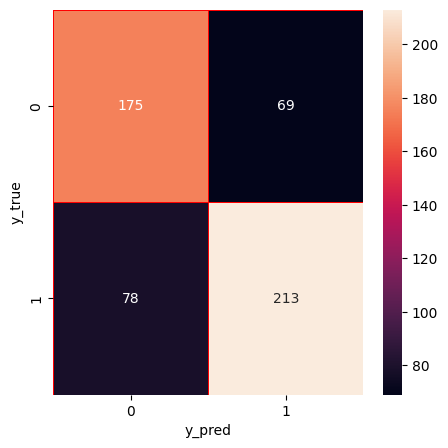

In [ ]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
tw1a.append(xg_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of XGBoost: 0.9788018433179724
Precision of XGBoost: 0.978980800793986
Recall of XGBoost: 0.9788018433179724
F1-score of XGBoost: 0.9787903220015959
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       566
           1       0.99      0.97      0.98       519

    accuracy                           0.98      1085
   macro avg       0.98      0.98      0.98      1085
weighted avg       0.98      0.98      0.98      1085



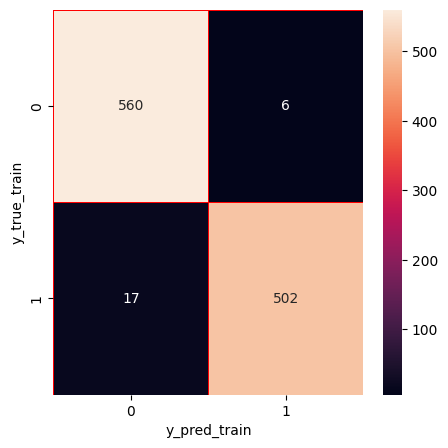

In [ ]:
xg_score=xg.score(X_train,y_train)
y_predict=xg.predict(X_train)
y_true=y_train
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
ttw1a.append(xg_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),

    }
    clf = xgb.XGBClassifier( **params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("XGBoost: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [04:12<00:00, 12.60s/trial, best loss: -0.7401869158878505]
XGBoost: Hyperopt estimated optimum {'learning_rate': -0.513622283653531, 'max_depth': 25.0, 'n_estimators': 90.0}


Accuracy of XGBoost: 0.7065420560747664
Precision of XGBoost: 0.7086392510813477
Recall of XGBoost: 0.7065420560747664
F1-score of XGBoost: 0.7070359527058584
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       244
           1       0.74      0.70      0.72       291

    accuracy                           0.71       535
   macro avg       0.71      0.71      0.71       535
weighted avg       0.71      0.71      0.71       535



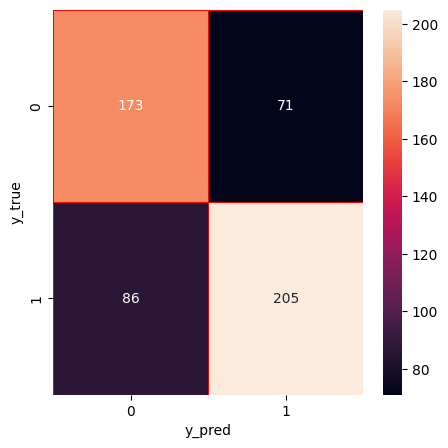

In [ ]:
xg = xgb.XGBClassifier(learning_rate= 2.2986325554851508, n_estimators = 90, max_depth = 99)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
th1a.append(xg_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of XGBoost: 0.9797235023041475
Precision of XGBoost: 0.9797235023041475
Recall of XGBoost: 0.9797235023041475
F1-score of XGBoost: 0.9797235023041475
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       566
           1       0.98      0.98      0.98       519

    accuracy                           0.98      1085
   macro avg       0.98      0.98      0.98      1085
weighted avg       0.98      0.98      0.98      1085



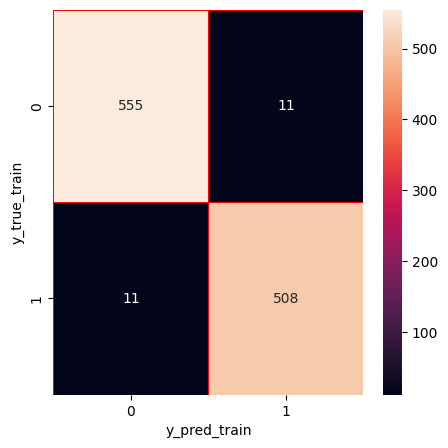

In [ ]:
xg_score=xg.score(X_train,y_train)
y_predict=xg.predict(X_train)
y_true=y_train
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tth1a.append(xg_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

Accuracy of RF: 0.7476635514018691
Precision of RF: 0.7529798327044529
Recall of RF: 0.7476635514018691
F1-score of RF: 0.7481242690144981
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       244
           1       0.80      0.72      0.76       291

    accuracy                           0.75       535
   macro avg       0.75      0.75      0.75       535
weighted avg       0.75      0.75      0.75       535



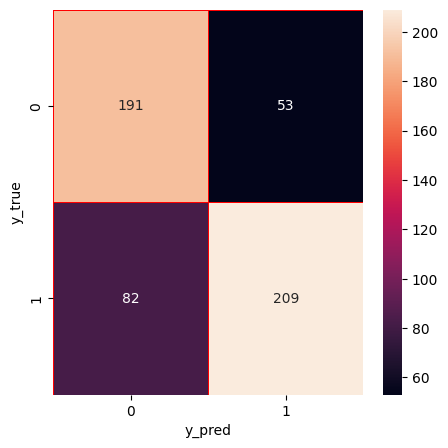

In [ ]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train)
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tw1a.append(rf_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of RF: 0.9797235023041475
Precision of RF: 0.9797431568272389
Recall of RF: 0.9797235023041475
F1-score of RF: 0.9797199808321446
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       566
           1       0.98      0.97      0.98       519

    accuracy                           0.98      1085
   macro avg       0.98      0.98      0.98      1085
weighted avg       0.98      0.98      0.98      1085



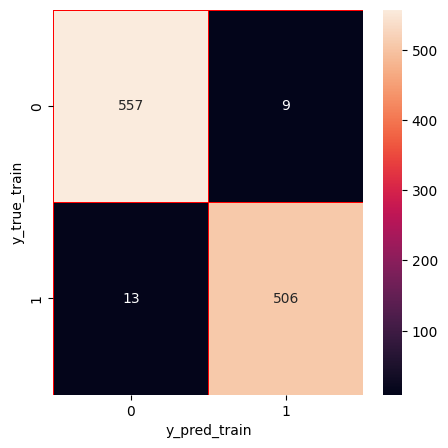

In [ ]:
rf_score=rf.score(X_train,y_train)
y_predict=rf.predict(X_train)
y_true=y_train
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
ttw1a.append(rf_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = RandomForestClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [00:28<00:00,  1.42s/trial, best loss: -0.7551401869158878]
Random Forest: Hyperopt estimated optimum {'criterion': 1, 'max_depth': 27.0, 'max_features': 10.0, 'min_samples_leaf': 10.0, 'min_samples_split': 2.0, 'n_estimators': 115.0}


Accuracy of RF: 0.7588785046728972
Precision of RF: 0.7667813798527121
Recall of RF: 0.7588785046728972
F1-score of RF: 0.7591903087909261
              precision    recall  f1-score   support

           0       0.70      0.81      0.75       244
           1       0.82      0.71      0.76       291

    accuracy                           0.76       535
   macro avg       0.76      0.76      0.76       535
weighted avg       0.77      0.76      0.76       535



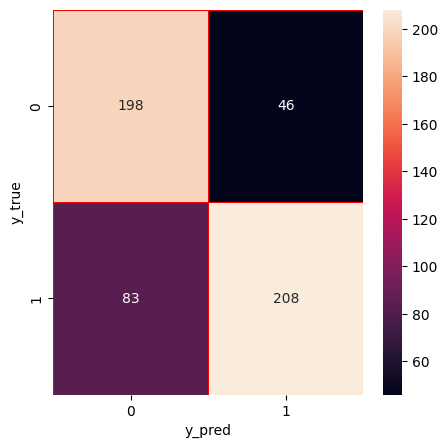

In [ ]:
rf_hpo = RandomForestClassifier(n_estimators = 55, min_samples_leaf = 10, max_depth = 29, min_samples_split = 9, max_features = 17, criterion = 'gini')
rf_hpo.fit(X_train,y_train)
rf_score=rf_hpo.score(X_test,y_test)
y_predict=rf_hpo.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
th1a.append(rf_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of RF: 0.9428571428571428
Precision of RF: 0.94426675012337
Recall of RF: 0.9428571428571428
F1-score of RF: 0.9427337789658711
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       566
           1       0.97      0.91      0.94       519

    accuracy                           0.94      1085
   macro avg       0.95      0.94      0.94      1085
weighted avg       0.94      0.94      0.94      1085



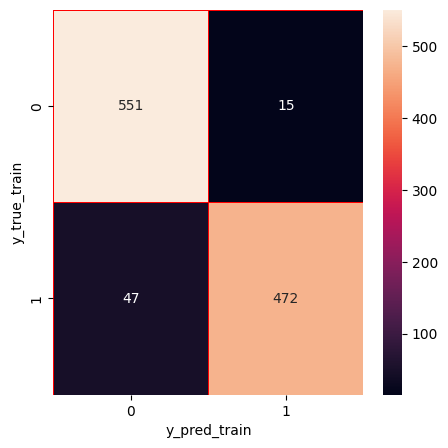

In [ ]:
rf_score=rf_hpo.score(X_train,y_train)
y_predict=rf_hpo.predict(X_train)
y_true=y_train
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tth1a.append(rf_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
rf_train=rf_hpo.predict(X_train)
rf_test=rf_hpo.predict(X_test)

Accuracy of DT: 0.6299065420560748
Precision of DT: 0.6323178877197568
Recall of DT: 0.6299065420560748
F1-score of DT: 0.6305500384493813
              precision    recall  f1-score   support

           0       0.59      0.63      0.61       244
           1       0.67      0.63      0.65       291

    accuracy                           0.63       535
   macro avg       0.63      0.63      0.63       535
weighted avg       0.63      0.63      0.63       535



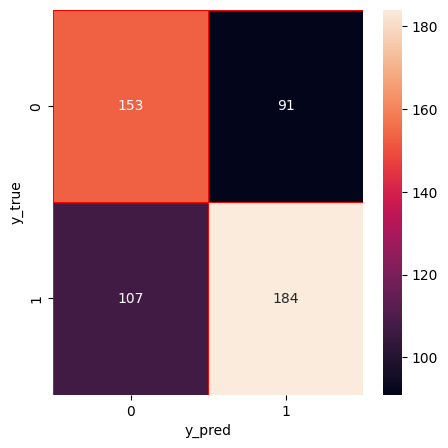

In [ ]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train)
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tw1a.append(dt_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of DT: 0.9797235023041475
Precision of DT: 0.9804821467757611
Recall of DT: 0.9797235023041475
F1-score of DT: 0.9796972501347825
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       566
           1       1.00      0.96      0.98       519

    accuracy                           0.98      1085
   macro avg       0.98      0.98      0.98      1085
weighted avg       0.98      0.98      0.98      1085



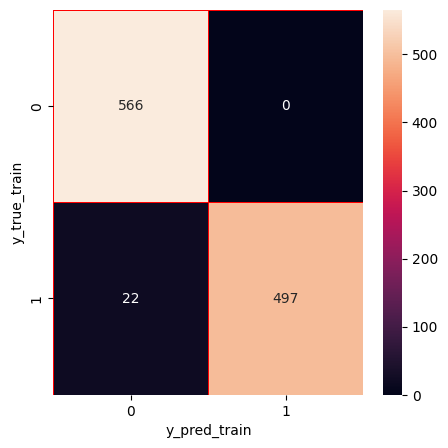

In [ ]:
dt_score=dt.score(X_train,y_train)
y_predict=dt.predict(X_train)
y_true=y_train
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
ttw1a.append(dt_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = DecisionTreeClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50)
print("Decision tree: Hyperopt estimated optimum {}".format(best))

100%|██████████| 50/50 [00:07<00:00,  6.92trial/s, best loss: -0.6579439252336449]
Decision tree: Hyperopt estimated optimum {'criterion': 0, 'max_depth': 11.0, 'max_features': 13.0, 'min_samples_leaf': 11.0, 'min_samples_split': 4.0}


Accuracy of DT: 0.6392523364485981
Precision of DT: 0.6430067190039512
Recall of DT: 0.6392523364485981
F1-score of DT: 0.6399494602273629
              precision    recall  f1-score   support

           0       0.60      0.65      0.62       244
           1       0.68      0.63      0.65       291

    accuracy                           0.64       535
   macro avg       0.64      0.64      0.64       535
weighted avg       0.64      0.64      0.64       535



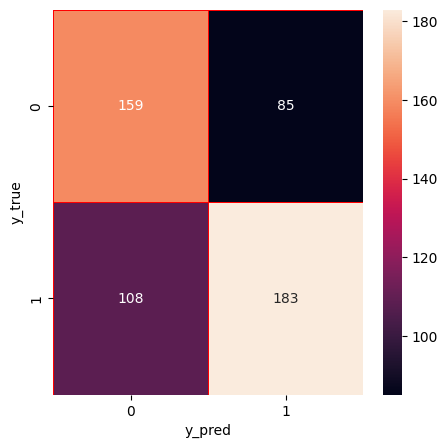

In [ ]:
dt_hpo = DecisionTreeClassifier(min_samples_leaf = 11, max_depth = 29, min_samples_split = 3, max_features = 9, criterion = 'gini')
dt_hpo.fit(X_train,y_train)
dt_score=dt_hpo.score(X_test,y_test)
y_predict=dt_hpo.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
th1a.append(dt_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of DT: 0.8175115207373271
Precision of DT: 0.8174638343099005
Recall of DT: 0.8175115207373271
F1-score of DT: 0.8174431380675302
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       566
           1       0.81      0.80      0.81       519

    accuracy                           0.82      1085
   macro avg       0.82      0.82      0.82      1085
weighted avg       0.82      0.82      0.82      1085



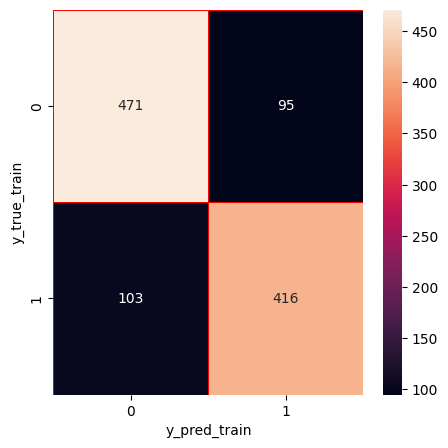

In [ ]:
dt_score=dt_hpo.score(X_train,y_train)
y_predict=dt_hpo.predict(X_train)
y_true=y_train
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tth1a.append(dt_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
dt_train=dt_hpo.predict(X_train)
dt_test=dt_hpo.predict(X_test)

Accuracy of ET: 0.7439252336448599
Precision of ET: 0.7504209177568524
Recall of ET: 0.7439252336448599
F1-score of ET: 0.7443388509426027
              precision    recall  f1-score   support

           0       0.69      0.79      0.74       244
           1       0.80      0.71      0.75       291

    accuracy                           0.74       535
   macro avg       0.75      0.75      0.74       535
weighted avg       0.75      0.74      0.74       535



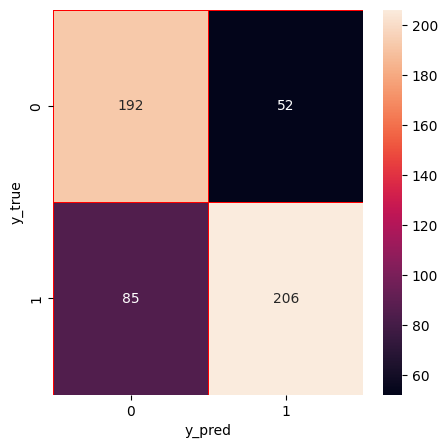

In [ ]:
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train)
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
tw1a.append(et_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of ET: 0.9797235023041475
Precision of ET: 0.9804821467757611
Recall of ET: 0.9797235023041475
F1-score of ET: 0.9796972501347825
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       566
           1       1.00      0.96      0.98       519

    accuracy                           0.98      1085
   macro avg       0.98      0.98      0.98      1085
weighted avg       0.98      0.98      0.98      1085



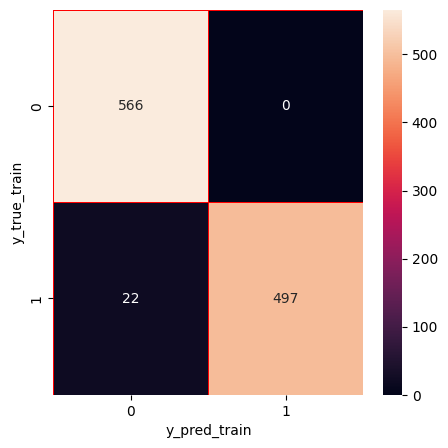

In [ ]:
et_score=et.score(X_train,y_train)
y_predict=et.predict(X_train)
y_true=y_train
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
ttw1a.append(et_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = ExtraTreesClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [00:10<00:00,  1.94trial/s, best loss: -0.7588785046728972]
Random Forest: Hyperopt estimated optimum {'criterion': 1, 'max_depth': 41.0, 'max_features': 11.0, 'min_samples_leaf': 9.0, 'min_samples_split': 4.0, 'n_estimators': 128.0}


Accuracy of ET: 0.7551401869158878
Precision of ET: 0.7623358623923894
Recall of ET: 0.7551401869158878
F1-score of ET: 0.7554996694452949
              precision    recall  f1-score   support

           0       0.70      0.80      0.75       244
           1       0.81      0.71      0.76       291

    accuracy                           0.76       535
   macro avg       0.76      0.76      0.76       535
weighted avg       0.76      0.76      0.76       535



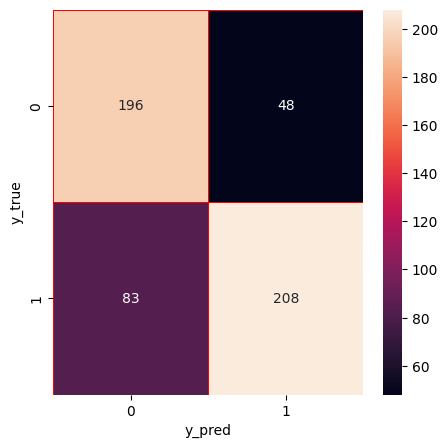

In [ ]:
et_hpo = ExtraTreesClassifier(n_estimators = 183, min_samples_leaf = 11, max_depth = 27, min_samples_split = 7, max_features = 19, criterion = 'entropy')
et_hpo.fit(X_train,y_train)
et_score=et_hpo.score(X_test,y_test)
y_predict=et_hpo.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
th1a.append(et_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of ET: 0.9253456221198156
Precision of ET: 0.9285813609974515
Recall of ET: 0.9253456221198156
F1-score of ET: 0.9250449615996071
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       566
           1       0.97      0.87      0.92       519

    accuracy                           0.93      1085
   macro avg       0.93      0.92      0.92      1085
weighted avg       0.93      0.93      0.93      1085



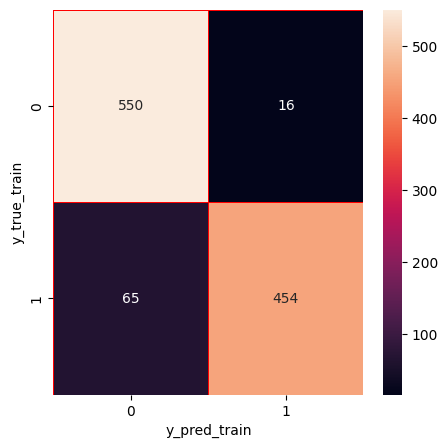

In [ ]:
et_score=et_hpo.score(X_train,y_train)
y_predict=et_hpo.predict(X_train)
y_true=y_train
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tth1a.append(et_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
et_train=et_hpo.predict(X_train)
et_test=et_hpo.predict(X_test)

[LightGBM] [Info] Number of positive: 519, number of negative: 566
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019466 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195837
[LightGBM] [Info] Number of data points in the train set: 1085, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.478341 -> initscore=-0.086690
[LightGBM] [Info] Start training from score -0.086690
Accuracy of LightGBM: 0.7420560747663552
Precision of LightGBM: 0.7439073962626761
Recall of LightGBM: 0.7420560747663552
F1-score of LightGBM: 0.7424740160065281
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       244
           1       0.78      0.74      0.76       291

    accuracy                           0.74       535
   macro avg       0.74      0.74      0.74       535
weighted avg       0.74      0.74      0.74       535



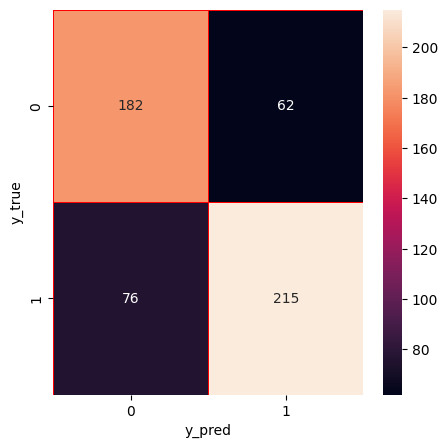

In [ ]:
lgbm = lgb.LGBMClassifier(random_state=0)
lgbm.fit(X_train, y_train)
lgbm_score = lgbm.score(X_test, y_test)
y_predict = lgbm.predict(X_test)
y_true = y_test
print('Accuracy of LightGBM: ' + str(lgbm_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of LightGBM: ' + str(precision))
print('Recall of LightGBM: ' + str(recall))
print('F1-score of LightGBM: ' + str(fscore))
print(classification_report(y_true, y_predict))
tw1a.append(lgbm_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of LightGBM: 0.9797235023041475
Precision of LightGBM: 0.9797332758213909
Recall of LightGBM: 0.9797235023041475
F1-score of LightGBM: 0.9797250551332766
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       566
           1       0.98      0.98      0.98       519

    accuracy                           0.98      1085
   macro avg       0.98      0.98      0.98      1085
weighted avg       0.98      0.98      0.98      1085



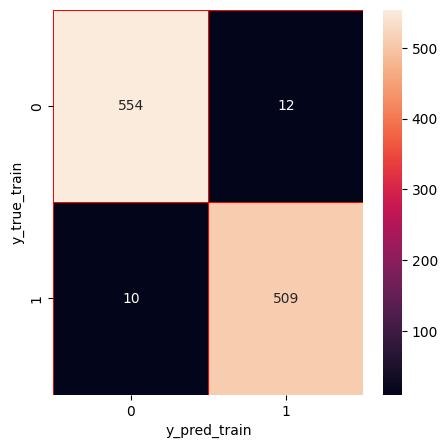

In [ ]:
lgbm_score = lgbm.score(X_train, y_train)
y_predict = lgbm.predict(X_train)
y_true = y_train
print('Accuracy of LightGBM: ' + str(lgbm_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of LightGBM: ' + str(precision))
print('Recall of LightGBM: ' + str(recall))
print('F1-score of LightGBM: ' + str(fscore))
print(classification_report(y_true, y_predict))
ttw1a.append(lgbm_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'num_leaves': int(params['num_leaves']),
        'min_child_samples': int(params['min_child_samples']),
        'learning_rate': params['learning_rate'],
        'subsample': params['subsample'],
        'colsample_bytree': params['colsample_bytree']
    }
    clf = lgb.LGBMClassifier(**params, random_state=0)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)
    return {'loss':-score, 'status': STATUS_OK }
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 1),
    'max_depth': hp.quniform('max_depth', 5, 30, 1),
    'num_leaves': hp.quniform('num_leaves', 20, 100, 1),
    'min_child_samples': hp.quniform('min_child_samples', 5, 50, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0)
}
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials)

print("LightGBM: Hyperopt estimated optimum {}".format(best))

[LightGBM] [Info] Number of positive: 519, number of negative: 566
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017725 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195837
[LightGBM] [Info] Number of data points in the train set: 1085, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.478341 -> initscore=-0.086690
[LightGBM] [Info] Start training from score -0.086690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Info] Number of positive: 519, number of negative: 566
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195837
[LightGBM] [Info] Number of data points in the train set: 1085, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.478341 -> initscore=-0.086690
[LightGBM] [Info] Start training from score -0.086690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

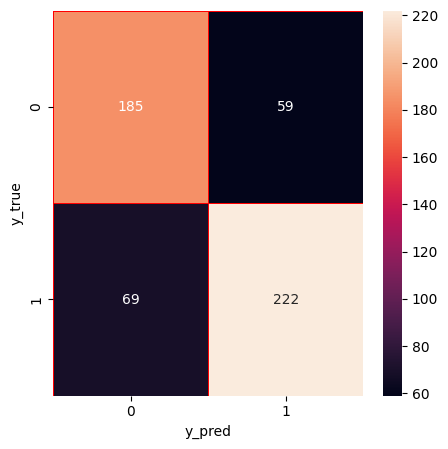

In [ ]:
best_params = {
    'n_estimators': 261,
    'max_depth': 6,
    'num_leaves': 85,
    'min_child_samples': 50,
    'learning_rate': 0.09334612157197188,
    'subsample':  0.7681448375221251,
    'colsample_bytree': 0.983344349150388
}
lgbm_hpo = lgb.LGBMClassifier(**best_params, random_state=0)
lgbm_hpo.fit(X_train, y_train)
lgbm_score = lgbm_hpo.score(X_test, y_test)
y_predict = lgbm_hpo.predict(X_test)
y_true = y_test
print('Accuracy of LightGBM (Hyperopt): ' + str(lgbm_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of LightGBM (Hyperopt): ' + str(precision))
print('Recall of LightGBM (Hyperopt): ' + str(recall))
print('F1-score of LightGBM (Hyperopt): ' + str(fscore))
th1a.append(lgbm_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
print(classification_report(y_true, y_predict))
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of LightGBM (Hyperopt): 0.9797235023041475
Precision of LightGBM (Hyperopt): 0.9797235023041475
Recall of LightGBM (Hyperopt): 0.9797235023041475
F1-score of LightGBM (Hyperopt): 0.9797235023041475
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       566
           1       0.98      0.98      0.98       519

    accuracy                           0.98      1085
   macro avg       0.98      0.98      0.98      1085
weighted avg       0.98      0.98      0.98      1085



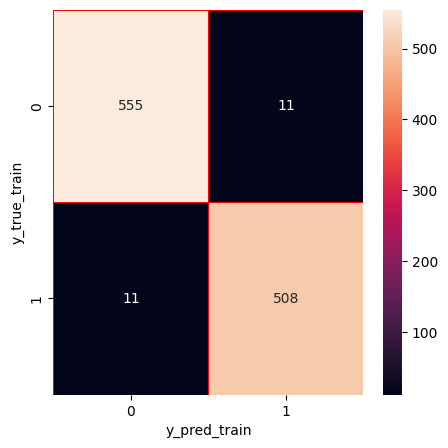

In [ ]:
lgbm_score = lgbm_hpo.score(X_train, y_train)
y_predict = lgbm_hpo.predict(X_train)
y_true = y_train
print('Accuracy of LightGBM (Hyperopt): ' + str(lgbm_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of LightGBM (Hyperopt): ' + str(precision))
print('Recall of LightGBM (Hyperopt): ' + str(recall))
print('F1-score of LightGBM (Hyperopt): ' + str(fscore))
print(classification_report(y_true, y_predict))
tth1a.append(lgbm_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
lgbm_train=lgbm_hpo.predict(X_train)
lgbm_test=lgbm_hpo.predict(X_test)

Accuracy of AdaBoost: 0.6990654205607477
Precision of AdaBoost: 0.6987912751481328
Recall of AdaBoost: 0.6990654205607477
F1-score of AdaBoost: 0.6989063221840947
              precision    recall  f1-score   support

           0       0.67      0.66      0.67       244
           1       0.72      0.73      0.72       291

    accuracy                           0.70       535
   macro avg       0.70      0.70      0.70       535
weighted avg       0.70      0.70      0.70       535



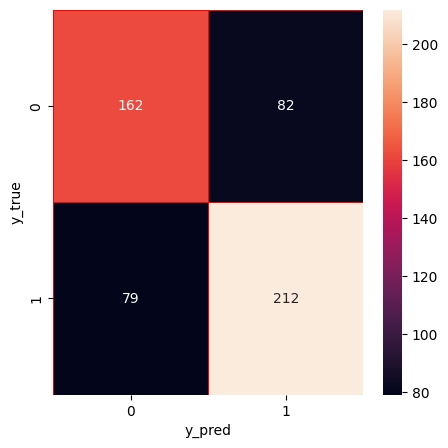

In [ ]:
adaboost = AdaBoostClassifier(random_state=0)
adaboost.fit(X_train, y_train)
adaboost_score = adaboost.score(X_test, y_test)
y_predict = adaboost.predict(X_test)
y_true = y_test
print('Accuracy of AdaBoost: ' + str(adaboost_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of AdaBoost: ' + str(precision))
print('Recall of AdaBoost: ' + str(recall))
print('F1-score of AdaBoost: ' + str(fscore))
tw1a.append(adaboost_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
print(classification_report(y_true, y_predict))
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of AdaBoost: 0.8866359447004608
Precision of AdaBoost: 0.8869400764110441
Recall of AdaBoost: 0.8866359447004608
F1-score of AdaBoost: 0.8865147389005414
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       566
           1       0.90      0.86      0.88       519

    accuracy                           0.89      1085
   macro avg       0.89      0.89      0.89      1085
weighted avg       0.89      0.89      0.89      1085



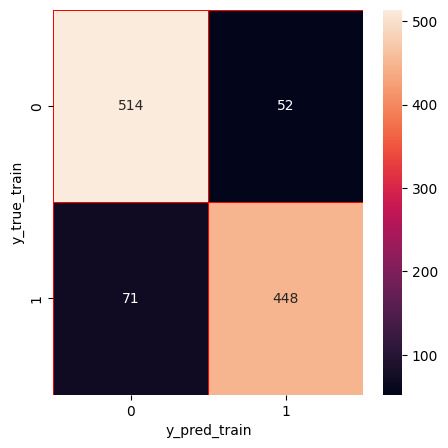

In [ ]:
adaboost_score = adaboost.score(X_train, y_train)
y_predict = adaboost.predict(X_train)
y_true = y_train
print('Accuracy of AdaBoost: ' + str(adaboost_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of AdaBoost: ' + str(precision))
print('Recall of AdaBoost: ' + str(recall))
print('F1-score of AdaBoost: ' + str(fscore))
ttw1a.append(adaboost_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
print(classification_report(y_true, y_predict))
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'learning_rate': params['learning_rate'],
    }
    clf = AdaBoostClassifier(**params, random_state=0)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)
    return {'loss': -score, 'status': STATUS_OK}
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
}
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials)
print("AdaBoost: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [06:46<00:00, 20.34s/trial, best loss: -0.7514018691588785]
AdaBoost: Hyperopt estimated optimum {'learning_rate': 0.08140707643481473, 'n_estimators': 191.0}


Accuracy of AdaBoost (Hyperopt): 0.7570093457943925
Precision of AdaBoost (Hyperopt): 0.7573880306183225
Recall of AdaBoost (Hyperopt): 0.7570093457943925
F1-score of AdaBoost (Hyperopt): 0.757156314569969
              precision    recall  f1-score   support

           0       0.73      0.74      0.74       244
           1       0.78      0.77      0.78       291

    accuracy                           0.76       535
   macro avg       0.76      0.76      0.76       535
weighted avg       0.76      0.76      0.76       535



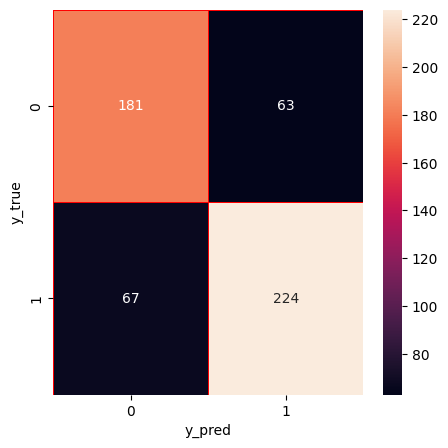

In [ ]:
best_params = {
    'n_estimators': 240,
    'learning_rate': 0.19739889570768732,
}
adaboost_hpo = AdaBoostClassifier(**best_params, random_state=0)
adaboost_hpo.fit(X_train, y_train)
adaboost_score = adaboost_hpo.score(X_test, y_test)
y_predict = adaboost_hpo.predict(X_test)
y_true = y_test
print('Accuracy of AdaBoost (Hyperopt): ' + str(adaboost_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of AdaBoost (Hyperopt): ' + str(precision))
print('Recall of AdaBoost (Hyperopt): ' + str(recall))
print('F1-score of AdaBoost (Hyperopt): ' + str(fscore))
print(classification_report(y_true, y_predict))
th1a.append(adaboost_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of AdaBoost (Hyperopt): 0.9308755760368663
Precision of AdaBoost (Hyperopt): 0.9324946672963907
Recall of AdaBoost (Hyperopt): 0.9308755760368663
F1-score of AdaBoost (Hyperopt): 0.9307060869917703
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       566
           1       0.96      0.89      0.93       519

    accuracy                           0.93      1085
   macro avg       0.93      0.93      0.93      1085
weighted avg       0.93      0.93      0.93      1085



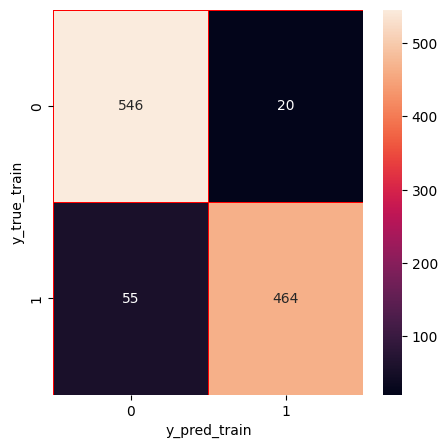

In [ ]:
adaboost_score = adaboost_hpo.score(X_train, y_train)
y_predict = adaboost_hpo.predict(X_train)
y_true = y_train
print('Accuracy of AdaBoost (Hyperopt): ' + str(adaboost_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of AdaBoost (Hyperopt): ' + str(precision))
print('Recall of AdaBoost (Hyperopt): ' + str(recall))
print('F1-score of AdaBoost (Hyperopt): ' + str(fscore))
print(classification_report(y_true, y_predict))
tth1a.append(adaboost_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
ttw = [ttw1a,ttw1p,ttw1r,ttw1f]
tw = [tw1a,tw1p,tw1r,tw1f]
tth = [tth1a,tth1p,tth1r,tth1f]
th = [th1a,th1p,th1r,th1f]
ttw = pd.DataFrame(ttw).transpose()
ttw.columns = ["Accuracy","Precision","Recall","F1Score"]
ttw.index = ["svm","xgb","rf","dt","et","lgbm","adaboost"]
tw = pd.DataFrame(tw).transpose()
tw.columns = ["Accuracy","Precision","Recall","F1Score"]
tw.index = ["svm","xgb","rf","dt","et","lgbm","adaboost"]
tth = pd.DataFrame(tth).transpose()
tth.columns = ["Accuracy","Precision","Recall","F1Score"]
tth.index = ["svm","xgb","rf","dt","et","lgbm","adaboost"]
th = pd.DataFrame(th).transpose()
th.columns = ["Accuracy","Precision","Recall","F1Score"]
th.index = ["svm","xgb","rf","dt","et","lgbm","adaboost"]

In [ ]:
df = pd.concat([ttw,tw,tth,th],axis=1)

In [ ]:
df

,Accuracy,Precision,Recall,F1Score,Accuracy,Precision,Recall,F1Score,Accuracy,Precision,Recall,F1Score,Accuracy,Precision,Recall,F1Score
svm,0.841475,0.847767,0.841475,0.840144,0.773832,0.778081,0.773832,0.774267,0.823963,0.834782,0.823963,0.821608,0.773832,0.782578,0.773832,0.774078
xgb,0.978802,0.978981,0.978802,0.978790,0.725234,0.726304,0.725234,0.725564,0.979724,0.979724,0.979724,0.979724,0.706542,0.708639,0.706542,0.707036
rf,0.979724,0.979743,0.979724,0.979720,0.747664,0.752980,0.747664,0.748124,0.942857,0.944267,0.942857,0.942734,0.758879,0.766781,0.758879,0.759190
dt,0.979724,0.980482,0.979724,0.979697,0.629907,0.632318,0.629907,0.630550,0.817512,0.817464,0.817512,0.817443,0.639252,0.643007,0.639252,0.639949
et,0.979724,0.980482,0.979724,0.979697,0.743925,0.750421,0.743925,0.744339,0.925346,0.928581,0.925346,0.925045,0.755140,0.762336,0.755140,0.755500
lgbm,0.979724,0.979733,0.979724,0.979725,0.742056,0.743907,0.742056,0.742474,0.979724,0.979724,0.979724,0.979724,0.760748,0.761901,0.760748,0.761058
adaboost,0.886636,0.886940,0.886636,0.886515,0.699065,0.698791,0.699065,0.698906,0.930876,0.932495,0.930876,0.930706,0.757009,0.757388,0.757009,0.757156


In [ ]:
df.to_excel("output_bert.xlsx")